## Nhập các thư viện:

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Lấy dữ liệu xuống thế nào?

In [0]:
# Vì dữ liệu không có header nên để None
data = pd.read_csv("http://cs.uit.edu.vn/data2.txt",header = None)

In [39]:
data.head()

,0,1
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [40]:
# Thay đổi tên cột của DataFrame để dễ hiểu
data.columns = ["Input Size","Times"]
data.head()

,Input Size,Times
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


## Chọn model và train thế nào?

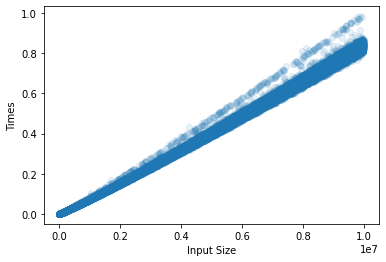

In [41]:
# Sort lại dữ liệu và tham số inplace = True để nó lưu lại trên chính data
data.sort_values(by = "Input Size",inplace= True)

# Phân dữ liệu dưới dạng ma trận
X = data.values[:,0]
Y = data.values[:,1:]

#Plot ra dữ liệu dạng scatter để dễ hình dung

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.scatter(X,Y,marker='o',alpha=0.1)

In [0]:
# Biển đổi thành ma trận lấy đặc trưng X và X^2 , (thử không kèm bias (toàn cột 1.00000))
poly = PolynomialFeatures(degree=2,include_bias=True)
X_trans_2th = poly.fit_transform(X.reshape(-1,1))

In [10]:
#Chiều của ma trận: để ý số hàng
X_trans_2th.shape

(71115, 3)

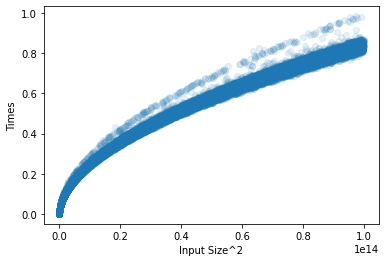

In [11]:
# Tương tự ta plot lên dữ liệu:
plt.xlabel(data.columns[0]+"^2")
plt.ylabel(data.columns[1])
plt.scatter(X_trans_2th[:,2],Y,marker='o',alpha=0.1)

### Chọn model

- Vì ta cần ước tính thời gian thực hiện nên ta dùng linear model:

In [54]:
# Tạo model 
LNGr = LinearRegression()
#Split dữ liệu
X_train , X_test , y_train , y_test = train_test_split(X_trans_2th,Y,test_size = 0.3)

# Fit model với dữ liệu train
LNGr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import r2_score

In [0]:
y_pred = LNGr.predict(X_test)

In [57]:
r2_score(y_test,y_pred)

0.9977741301351868

In [46]:
print("Độ chính xác của model:",LNGr.score(X_test,y_test))

Độ chính xác của model: 0.997977999641993


In [15]:
# lấy hệ số ra
print("Hệ số của model:",LNGr.coef_)

# Và bias
print("Bias của model:",LNGr.intercept_)

Hệ số của model: [[0.00000000e+00 7.85875745e-08 5.97214092e-16]]
Bias của model: [-0.00592727]


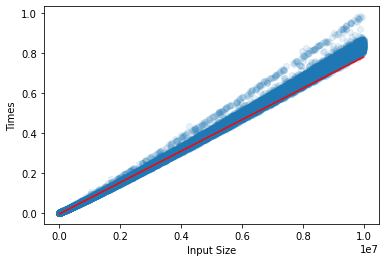

In [16]:
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.scatter(X,Y,marker='o',alpha=0.1)

plt.plot(X,X*LNGr.coef_[0][1] + X*LNGr.coef_[0][2] +LNGr.intercept_ ,"r")

### Thử thêm feature X*np.log(X):

In [0]:
X_log = X * np.log(X)

In [0]:
# stack : chồng dữ liệu lên theo chiều dọc : hstack axis = 1
X_ = np.hstack((X_trans_2th,X_log.reshape(-1,1)))

In [19]:
%%time
LNGr = LinearRegression()
X_train , X_test , y_train , y_test = train_test_split(X_,Y,test_size = 0.3)
LNGr.fit(X_train,y_train)
print("Score:",LNGr.score(X_test,y_test))


Score: 0.997977999641993
CPU times: user 15.7 ms, sys: 2.91 ms, total: 18.6 ms
Wall time: 17.5 ms


CPU times: user 44.2 ms, sys: 27.7 ms, total: 72 ms
Wall time: 45.2 ms


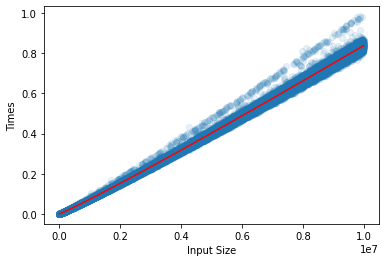

In [20]:
%%time
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.scatter(X,Y,marker='o',alpha=0.1)
plt.plot(X,X*LNGr.coef_[0][1]+ X*X*LNGr.coef_[0][2] + X*np.log(X) * LNGr.coef_[0][3] +LNGr.intercept_ ,"r")

- Lưu lại model

In [36]:
import pickle
s = pickle.dumps(LNGr)

from joblib import dump, load
dump(LNGr, '/content/drive/My Drive/assignment/mymodel.joblib') 

['/content/drive/My Drive/assignment/mymodel.joblib']

## Tạo ứng dụng:

In [0]:
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 

In [0]:
y = Y

In [0]:
class log_transform(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.X = X
    self.y = y
  def fit( self, X, y = None ):
    return self
  def transform(self, X, y = None):
    return (X * np.log(X))

In [35]:
my_pipeline = Pipeline( steps = [("my_transform",log_transform()),("linear",load('mymodel.joblib'))])

my_pipeline.fit(X.reshape(-1,1),y)

Pipeline(memory=None,
         steps=[('my_transform', log_transform()),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)